#  ***ZOMATO RESTAURANT RECOMMANDATION SYSTEM***








# Mount the dataset into colab notebook.

In [210]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Upload the image

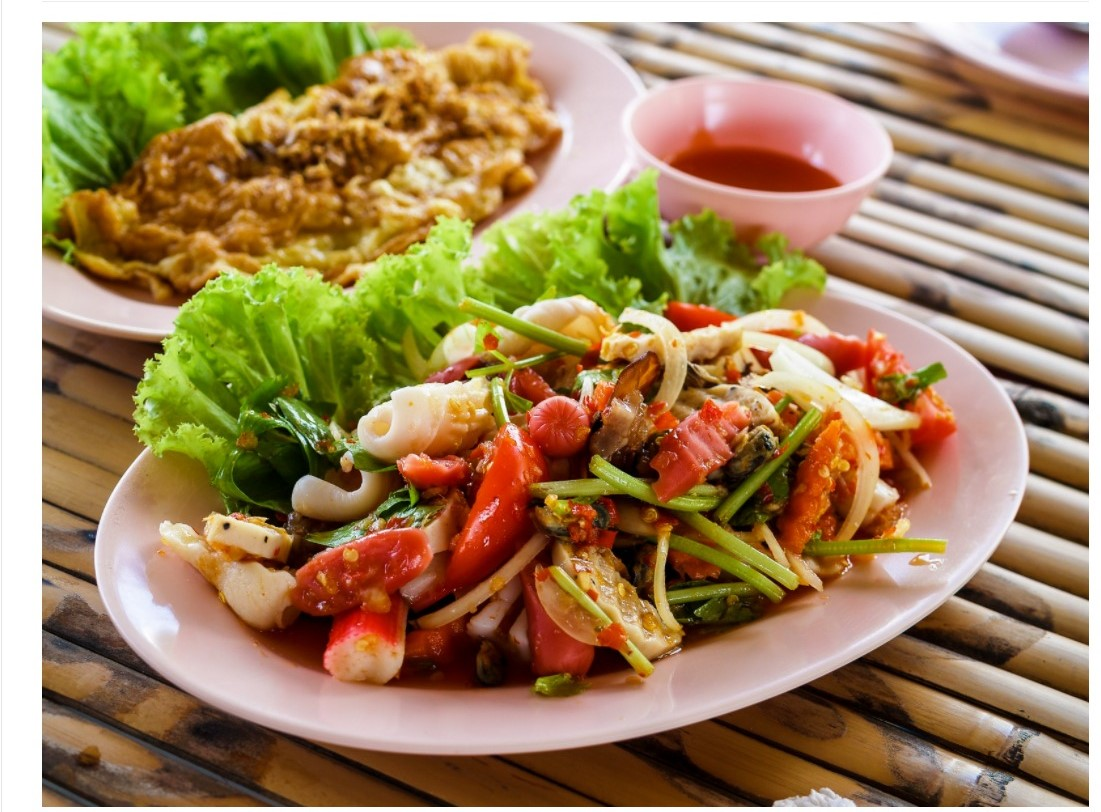

In [211]:
from IPython import display
display.Image("/content/drive/MyDrive/dataset/image.jpeg",width=800)


# Importing libraries.

In [212]:
#Importing Libraries
import numpy as np #NumPy is a general-purpose array-processing package.
import pandas as pd #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy.
import matplotlib.pyplot as plt #It is a Plotting Library
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import seaborn as sb  
from sklearn.metrics import r2_score

#Loading and reading a dataset.

In [213]:
zomato_data=pd.read_csv("/content/drive/MyDrive/dataset/zomato.csv")
zomato_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data cleaning 
* Deleting redundant columns.
* Renaming the columns.
* Dropping duplicates.
* Cleaning individual columns.
* Remove the NaN values from the dataset
* Some Transformations



Looking at the information about dataset,datatypes of the corresponding columns and missing values.

In [214]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

#Checking NULL values.

In [215]:
zomato_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

# Deleting unnecessary columns. 
 Droping the columns "url" , "dish_like" , "phone"and saving the dataset as 'zomato".

In [216]:
zomato=zomato_data.drop(['url','dish_liked','phone','address','location','rest_type', 'menu_item','reviews_list', 'votes'],axis=1)

#Removing the duplicates.

In [217]:
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset.

In [218]:
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43586 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43586 non-null  object
 1   online_order                 43586 non-null  object
 2   book_table                   43586 non-null  object
 3   rate                         43586 non-null  object
 4   cuisines                     43586 non-null  object
 5   approx_cost(for two people)  43586 non-null  object
 6   listed_in(type)              43586 non-null  object
 7   listed_in(city)              43586 non-null  object
dtypes: object(8)
memory usage: 3.0+ MB


Reading column names

In [219]:
#Reading column names
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#Changing the Columns Names.

In [220]:
#Changing the Columns Names
zomato.columns
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'cuisines', 'cost',
       'type', 'city'],
      dtype='object')

#Some Transformations.

In [221]:
#Changaing the cost to string.
zomato['cost'] = zomato['cost'].astype(str)

#Using lambda function to replace ',' from cost.
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.'))

# Changing the cost to folat.
zomato['cost'] = zomato['cost'].astype(float)
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43586 entries, 0 to 51716
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43586 non-null  object 
 1   online_order  43586 non-null  object 
 2   book_table    43586 non-null  object 
 3   rate          43586 non-null  object 
 4   cuisines      43586 non-null  object 
 5   cost          43586 non-null  float64
 6   type          43586 non-null  object 
 7   city          43586 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.0+ MB


#Reading rate dataset.

In [222]:
#Reading rate dataset.
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#Removing '/5' from Rates.

In [223]:
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

##Label Encoding

In [224]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [225]:
zomato['online_order'].value_counts()

Yes    27133
No     14195
Name: online_order, dtype: int64

In [226]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
zomato.online_order[zomato.online_order == 'Yes'] = 1
zomato.online_order[zomato.online_order == 'No'] = 0
zomato.online_order = pd.to_numeric(zomato.online_order)


In [227]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
zomato.book_table[zomato.book_table == 'Yes'] = 1
zomato.book_table[zomato.book_table == 'No'] = 0
zomato.book_table = pd.to_numeric(zomato.book_table)


In [228]:
zomato.city = labelEncoder.fit_transform(zomato.city)
labelEncoder.classes_

array(['BTM', 'Banashankari', 'Bannerghatta Road', 'Basavanagudi',
       'Bellandur', 'Brigade Road', 'Brookefield', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar', 'JP Nagar',
       'Jayanagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [229]:
zomato.cuisines = labelEncoder.fit_transform(zomato.cuisines)
labelEncoder.classes_

array(['African, Burger',
       'African, Burger, Desserts, Beverages, Fast Food', 'American', ...,
       'Vietnamese', 'Vietnamese, Salad',
       'Vietnamese, Thai, Burmese, Japanese'], dtype=object)

In [231]:
zomato.type = labelEncoder.fit_transform(zomato.type)
labelEncoder.classes_

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [232]:
zomato.head()

,name,online_order,book_table,rate,cuisines,cost,type,city
0,Jalsa,1,1,4.1,1901,800.0,0,1
1,Spice Elephant,1,0,4.1,817,800.0,0,1
2,San Churro Cafe,1,0,3.8,654,800.0,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,2229,300.0,0,1
4,Grand Village,0,0,3.8,1928,600.0,0,1


In [233]:
zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'cuisines', 'cost',
       'type', 'city'],
      dtype='object')

In [235]:
x = zomato.iloc[:,[1,2,4,5,6,7]]
y = zomato['rate']

In [165]:
zomato.head()

,name,online_order,book_table,rate,cuisines,cost,reviews_list,type,city
0,Jalsa,1,1,4.1,1901,800.0,10218,0,1
1,Spice Elephant,1,0,4.1,817,800.0,11854,0,1
2,San Churro Cafe,1,0,3.8,654,800.0,4303,0,1
3,Addhuri Udupi Bhojana,0,0,3.7,2229,300.0,8715,0,1
4,Grand Village,0,0,3.8,1928,600.0,14694,0,1


In [236]:
## Checking Null values
zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
cuisines        0
cost            0
type            0
city            0
dtype: int64

In [237]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41328 entries, 0 to 41327
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41328 non-null  object 
 1   online_order  41328 non-null  int64  
 2   book_table    41328 non-null  int64  
 3   rate          41328 non-null  float64
 4   cuisines      41328 non-null  int64  
 5   cost          41328 non-null  float64
 6   type          41328 non-null  int64  
 7   city          41328 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 2.5+ MB


# Text Preprocessing

#Some of the common text preprocessing / cleaning steps are:
* Lower casing
* Removal of Punctuations
* Removal of Stopwords
* Removal of URLs
* Spelling correction

In [238]:
# 5 examples of these columns before text processing:
zomato[['name', 'cuisines']].sample(5)

,name,cuisines
34795,CAMP TANDOOR,1590
10349,Fatima Bakery,239
23571,Dev's Gugababa,273
5120,Petoo,1839
22430,Paratha Plaza,1590


# Lower Casing

In [239]:
# Lower Casing
zomato["name"] = zomato["name"].str.lower()
zomato[['name', 'cuisines']].sample(5)

,name,cuisines
6935,tapri by the corner,1093
3834,ambur dum biriyani,333
2420,kamat bugle rock,2206
4761,the belgian waffle co.,1042
11355,samosa singh,2289


# Removal of Puctuations

In [240]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["name"] = zomato["name"].apply(lambda text: remove_punctuation(text))
zomato[['name', 'cuisines']].sample(5)

,name,cuisines
1013,the cake ville,233
14788,wall street 657,1216
1889,kalingas,2019
30049,tea and wine lounge,687
5976,celebrations 365,1059


# Removal of Stopwords

In [241]:
 import nltk
 nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["name"] = zomato["name"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Removal of URLS

In [242]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    zomato['name'] = zomato['name'].str.replace(char, ' ')

In [244]:
zomato = zomato.loc[zomato.rate !='\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â©']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â©') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash)
zomato['name'].head()

0                    jalsa
1           spice elephant
2          san churro cafe
3    addhuri udupi bhojana
4            grand village
Name: name, dtype: object

In [245]:
zomato[['name', 'cuisines']].sample(5)

,name,cuisines
16251,juicemaker,1388
31558,sardarji ka kitchen,1590
18542,udupi upachar,2246
24939,oms cafe prana,598
17994,tandoor spice,1682


In [246]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
restaurant_names

['jalsa',
 'spice elephant',
 'san churro cafe',
 'addhuri udupi bhojana',
 'grand village',
 'timepass dinner',
 'rosewood international hotel bar restaurant',
 'onesta',
 'penthouse cafe',
 'smacznego',
 'cafã\x83â\x83ã\x82â\x83ã\x83â\x82ã\x82â\x83ã\x83â\x83ã\x82â\x82ã\x83â\x82ã\x82â© alley',
 'cafe shuffle',
 'coffee shack',
 'cafeleven',
 'cafe vivacity',
 'catchupino',
 'kirthis biryani',
 't3h cafe',
 '360 atoms restaurant cafe',
 'vintage cafe',
 'woodee pizza',
 'cafe coffee day',
 'tea house',
 'hide cafe',
 'cafe nova',
 'coffee tindi',
 'sea green cafe',
 'cuppa',
 'srinathjis cafe',
 'redberrys',
 'foodiction',
 'sweet truth',
 'ovenstory pizza',
 'faasos',
 'behrouz biryani',
 'fast fresh',
 'szechuan dragon',
 'empire restaurant',
 'maruthi davangere benne dosa',
 'chaatimes',
 'havyaka mess',
 'mcdonalds',
 'dominos pizza',
 'hotboxit',
 'kitchen garden',
 'recipe',
 'beijing bites',
 'tasty bytes',
 'petoo',
 'shree cool point',
 'corner house ice cream',
 'biryanis',
 

##Using KNN

In [247]:
knn_data = (zomato.groupby(by = ['name'])['rate'].count().reset_index().rename(columns = {'rate': 'totalRatingCount'}))

In [248]:
knn_data.columns

Index(['name', 'totalRatingCount'], dtype='object')

In [250]:
knn_data.tail()

,name,totalRatingCount
6518,zoeys,7
6519,zoroy luxury chocolate,11
6520,zus doner kebaps,6
6521,zyara,4
6522,zyksha,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9588c84310>]],
      dtype=object)

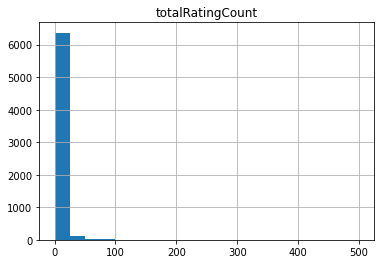

In [251]:
knn_data[['totalRatingCount']].hist(bins=[0,25,50,100,500])

In [252]:
knn_data['totalRatingCount'].describe()

count    6523.000000
mean        6.335735
std         6.973234
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        86.000000
Name: totalRatingCount, dtype: float64

In [253]:
rest_MeanRating = (zomato.groupby(by = ['name'])['rate'].mean().reset_index().rename(columns = {'rating': 'AvgRating'}))

In [254]:
rest_with_totalRatingCount = zomato.merge(knn_data, left_on = 'name', right_on = 'name', how = 'left')
rest_with_totalRatingCount.head()

,name,online_order,book_table,rate,cuisines,cost,type,city,totalRatingCount
0,jalsa,1,1,4.1,1901,800.0,0,1,11
1,spice elephant,1,0,4.1,817,800.0,0,1,4
2,san churro cafe,1,0,3.8,654,800.0,0,1,11
3,addhuri udupi bhojana,0,0,3.7,2229,300.0,0,1,2
4,grand village,0,0,3.8,1928,600.0,0,1,4


In [255]:
rest_with_totalRatingCount.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
cuisines            0
cost                0
type                0
city                0
totalRatingCount    0
dtype: int64

In [256]:
threshold_count = 50
rating_popular_rest= rest_with_totalRatingCount[rest_with_totalRatingCount['totalRatingCount'] > threshold_count]
rating_popular_rest.head()

,name,online_order,book_table,rate,cuisines,cost,type,city,totalRatingCount
7,onesta,1,1,4.6,2036,600.0,1,1,85
22,cafe coffee day,0,0,3.6,598,900.0,1,1,86
32,sweet truth,1,0,3.9,230,500.0,2,1,58
34,faasos,1,0,4.2,1642,500.0,2,1,56
38,empire restaurant,1,0,4.4,1922,750.0,2,1,69


In [185]:
rating_popular_rest.shape,rest_with_totalRatingCount.shape

((1467, 10), (41368, 10))

In [257]:
rating_popular_rest[['rate','totalRatingCount']].describe()

,rate,totalRatingCount
count,1466.000000,1466.000000
mean,3.745566,62.402456
std,0.452461,9.839689
min,2.200000,51.000000
25%,3.500000,56.000000
50%,3.800000,59.000000
75%,4.000000,68.000000
max,4.700000,86.000000


# Create Pivot Table

In [258]:
## First lets create a Pivot matrix
rest_features_df=rating_popular_rest.pivot_table(index='name',columns='cuisines',values='rate').fillna(0)
rest_features_df.head()

cuisines,222,230,291,333,348,379,386,399,458,459,464,476,598,627,840,846,1036,1042,1047,1050,1052,1059,1062,1093,1103,1115,1118,1187,1262,1275,1279,1297,1304,1307,1446,1535,1590,1642,1827,1839,1922,1942,1990,2026,2036,2042,2069,2093,2094
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ambur hot dum biryani,0.000,0.000000,0.0,3.268421,3.4,3.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bake,3.372,3.427907,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
baskin robbins,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,3.561667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beijing bites,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.643478,3.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
burger king,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.866667,3.848077,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
sum(rest_features_df.isin([0]).sum()) / (rest_features_df.shape[0]*rest_features_df.shape[1])

0.9523809523809523

In [261]:
from scipy.sparse import csr_matrix
rest_features_df_matrix = csr_matrix(rest_features_df.values)

# Find records which are similar based on COSINE similarity

cos 0=1

cos90=0

cos180=-1

cos270=0

cos360=1


In [262]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine')#, algorithm = 'brute')
model_knn.fit(rest_features_df_matrix)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

# Find Recommendations

1. No of recommendations = 5

2. Print Recommendation and Cosine Distance

In [263]:
rest_features_df.iloc[query_index,:].values.shape

(49,)

In [264]:
rest_features_df.iloc[query_index,:].values.reshape(1, -1).shape

(1, 49)

In [265]:
rest_features_df.head()

cuisines,222,230,291,333,348,379,386,399,458,459,464,476,598,627,840,846,1036,1042,1047,1050,1052,1059,1062,1093,1103,1115,1118,1187,1262,1275,1279,1297,1304,1307,1446,1535,1590,1642,1827,1839,1922,1942,1990,2026,2036,2042,2069,2093,2094
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ambur hot dum biryani,0.000,0.000000,0.0,3.268421,3.4,3.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bake,3.372,3.427907,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
baskin robbins,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.9,3.561667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beijing bites,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,3.643478,3.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
burger king,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,3.866667,3.848077,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Output of kneighbours is list of indexes and their distances from given record

#### output is sorted with ascending distances

In [266]:
query_index = np.random.choice(rest_features_df.shape[0])
distances, indices = model_knn.kneighbors(rest_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [267]:
def recommendat(name, n=5, measure="euclidean"):
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(rest_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}'.format(i, rest_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

In [268]:
recommendat('onesta')

Recommendations for five star chicken:

1: rolls wheels, with distance of 0.676345928515736
2: mcdonalds, with distance of 0.7428330612019494
3: pizza hut, with distance of 1.0
4: petoo, with distance of 1.0
5: subway, with distance of 1.0


##Accuracy

In [270]:
x= zomato.iloc[:,[1,2,4,5,6,7]]
y = zomato['rate']

In [271]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)


In [272]:
x_train.head()


,online_order,book_table,cuisines,cost,type,city
36581,0,0,2310,200.0,4,25
12188,1,0,1745,500.0,4,9
18929,1,0,476,650.0,1,14
16449,1,0,1271,500.0,2,13
31838,1,0,1801,1.4,2,22


In [273]:
y_train.head()

36581    3.7
12188    4.0
18929    3.6
16449    3.6
31838    3.6
Name: rate, dtype: float64

In [274]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37195, 6)
(37195,)
(4133, 6)
(4133,)


##RANDOM FOREST

In [275]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [276]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [277]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.6101321602786556

#KNN

In [278]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(x_train,y_train)
prediction=KNN.predict(x_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')


In [279]:
# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

In [280]:
# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, x , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [91.57144017 92.80827108 93.4998913  92.79688339 92.32137938 96.22468119
 96.46080032 94.35065049 92.80216802 91.64534642]

Final Average Accuracy of the model: 93.45
